<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods:  9. Initial-value problems
## Euler method
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss solution strategies for differential eqautions with boundary conditions
defined along **one side**, the group of `initial-value problems`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load own library
import numerics.change_fonts
numerics.change_fonts.change_fontsize()

We first define a differential equation of first order with an initial value:
$$
\begin{array}{rcl}
{{dy}\over{dt}} &=& y - t^2 +1, \quad 0 \le t \le 5 \\
y(t=0) &=& 0.5
\end{array}
$$

We define the right-hand side of the differential equation as function:

In [2]:
def rhs(t,y):
    '''
    #----------------------------------------------------------------------
    # right-hand side function rhs(x)
    #----------------------------------------------------------------------
    '''
    y = y - t**2 + 1
    return y

A solution of the above differential equation is:
$$
y(t) = (t+1)^2 - 0.5 e^{t}
$$
which we use as analytical solution for comparison ...

In [3]:
def fexact(t):
    # analytical solution
    y = (t + 1)**2 - 0.5*np.exp(t)
    return y

## Euler method

One of the most simple methods to solve such a differential equation is the **Euler method**:
$$
\begin{array}{rcl}
w_0 &=& \alpha \\
w_{i+1} &\simeq& w_{i} + h \quad rhs(t_i,w_i)
\end{array}
$$
Here, $w_0$ is the initial value, $w_i$ the iterative solution at point $t_i$, 
with $t$ the independent variable.

The step size $h$ must be chosen, as well as the right-hand side function $rhs(t,y)$.

We reformulate the solution strategy as function:

In [4]:
def ivp_euler(rhs,t,y,h):
    '''
    #----------------------------------------------------------------------
    # subroutine performs simple Euler integration for ordinary DGL
    # y' = f(t,y), y(0)=y_1, t in [a,b]
    # Input:
    # rhs   - right hand side of differential equation
    # t     - integration variable t_i
    # y     - approximate solution w_i
    # h     - step size
    # Output:
    # ynew  - new approximate solution w_(i+1)
    # (c) Georg Kaufmann
    #----------------------------------------------------------------------
    '''
    k1 = rhs(t,y)
    ynew = y + h * k1
    return ynew

Set the initial condition and the integration parameters:

In [5]:
a     = 0.
b     = 5.
alpha = 0.5
n = 21
h = (b-a) / float(n-1)
print ("%3s %5.2f %3s %5.2f %7s %5.2f %3s %4i %3s %5.2f" % ('a:',a,'b:',b,'alpha:',alpha,'n:',n,'h:',h))

 a:  0.00  b:  5.00  alpha:  0.50  n:   21  h:  0.25


Then solve the differential equation:

In [6]:
t = np.array([]); y1 = np.array([]); yexact = np.array([])
# initial values
t=np.append(t,a)
y1=np.append(y1,alpha)
yexact=np.append(yexact,alpha)
print ("%4i %10.4f %10.2f %10.2f %10.2f" % (0,h,t[0],y1[0],yexact[0]))
# run over interal
for i in np.arange(1,n):
    t=np.append(t,t[i-1]+h)
    ynew = ivp_euler(rhs,t[i-1],y1[i-1],h)
    y1=np.append(y1,ynew)
    yexact=np.append(yexact,fexact(t[i]))
    print ("%4i %10.4f %10.2f %10.2f %10.2f" % (i,h,t[i],y1[i],yexact[i]))

   0     0.2500       0.00       0.50       0.50
   1     0.2500       0.25       0.88       0.92
   2     0.2500       0.50       1.33       1.43
   3     0.2500       0.75       1.85       2.00
   4     0.2500       1.00       2.42       2.64
   5     0.2500       1.25       3.02       3.32
   6     0.2500       1.50       3.64       4.01
   7     0.2500       1.75       4.24       4.69
   8     0.2500       2.00       4.78       5.31
   9     0.2500       2.25       5.22       5.82
  10     0.2500       2.50       5.52       6.16
  11     0.2500       2.75       5.58       6.24
  12     0.2500       3.00       5.34       5.96
  13     0.2500       3.25       4.67       5.17
  14     0.2500       3.50       3.45       3.69
  15     0.2500       3.75       1.50       1.30
  16     0.2500       4.00      -1.40      -2.30
  17     0.2500       4.25      -5.49      -7.49
  18     0.2500       4.50     -11.13     -14.76
  19     0.2500       4.75     -18.73     -24.73
  20     0.2500     

Finally, we compare the numerical solution with the analytical solution:

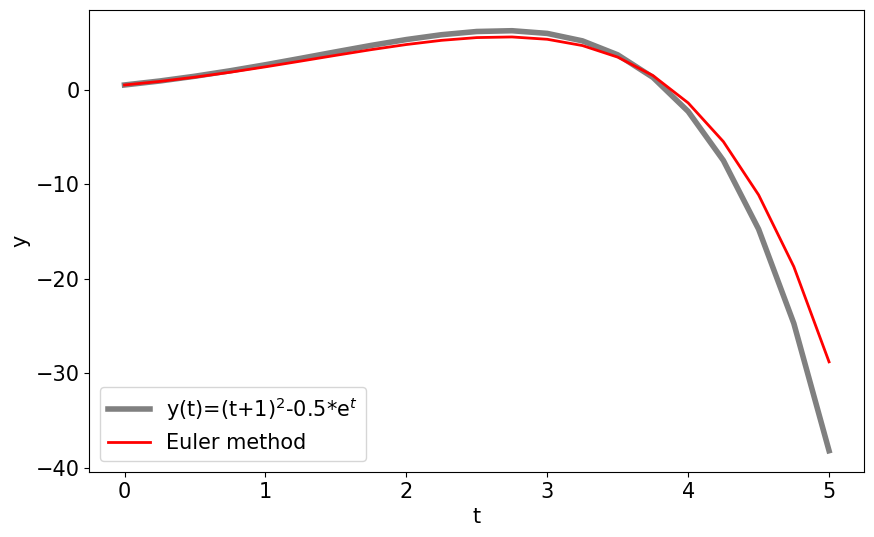

In [7]:
plt.figure(figsize=(10,6))
plt.xlabel('t')
plt.ylabel('y')
plt.plot(t,yexact,linewidth=4,color='gray',label='y(t)=(t+1)$^2$-0.5*e$^t$')
plt.plot(t,y1,linewidth=2,color='red',label='Euler method')
plt.legend()

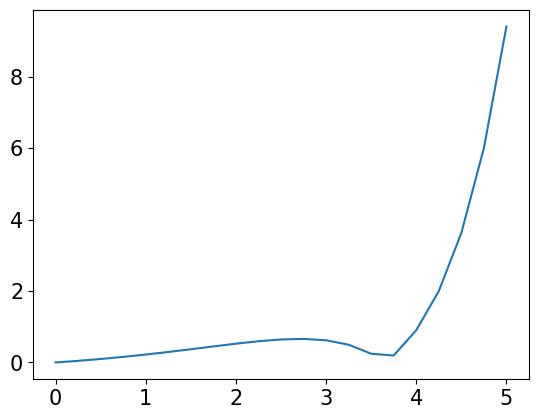

In [8]:
plt.plot(t,np.abs(y1-yexact))

----
[next>](Numerics_lab09_eulermod.ipynb)